In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('../data/data_clean_1.csv')

In [3]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun
0,28,5,26,21.934911,12,E10,0,0,0
1,12,"4,2",30,21.934911,13,E10,0,0,0
2,"11,2","5,5",38,21.934911,15,E10,0,0,0
3,"12,9","3,9",36,21.934911,14,E10,0,0,0
4,"18,5","4,5",46,21.934911,15,E10,0,0,0


## Preparing data to create the plots

In [4]:
data['consume'] = data['consume'].str.replace(',', '.')

In [5]:
data['consume'] = pd.to_numeric(data['consume'], errors='coerce')

In [6]:
data['consume'].unique()

array([ 5. ,  4.2,  5.5,  3.9,  4.5,  6.4,  4.4,  5.3,  5.6,  4.6,  5.9,
        5.1,  4.7,  4.9,  5.7,  4.1,  5.8,  4.8,  4.3,  5.2,  7.4,  6.5,
        4. ,  3.3,  9.9,  6.1,  6.2,  7.9, 12.2,  5.4,  3.6,  6.9,  8.7,
        6.3,  6. , 10.8,  8.1,  7.1,  3.8,  9. ,  3.7, 11.5,  6.6])

In [7]:
data['distance'] = data['distance'].str.replace(',', '.')

In [8]:
data['distance'] = pd.to_numeric(data['distance'], errors='coerce')

In [9]:
data['distance'].unique()

array([ 28. ,  12. ,  11.2,  12.9,  18.5,   8.3,   7.8,  12.3,   4.9,
        11.9,  12.4,  11.8,  24.7,  17.3,  33.4,  25.9,  25.3,  14.2,
        17.9,  18.4,  18.3,  32.6,  19. ,  12.1,  20. ,   4.5,  11.7,
        10.2,   5.4,   2. ,  16. ,  27.3,  10.6,  11.6,  13.1,   6.1,
       153.5,   2.9,   2.1,   9.8,   6.8,  14. ,  13.9,   9.7,  24.8,
        34.8,   5.2,  10.5,  13.2,  13. ,  12.2,  12.5,  15.7,   6.4,
         5.3,  26.2,  18.8,  22.9, 162.7,  16.6,  15.9,   5.1,  22.4,
        31.1,  16.1,   4.2,  17.4,  23.5,   7. ,  20.1,  20.8,   1.7,
        35.9,  36.9,  16.8,   9.9,  36.6,  44.9,  21.6,  39.4,  26.6,
        53.2,  18.9,  43.5,  16.4,  21.1,  22.7,  44.4,  35.8,  40.6,
        14.1,  58.7,  16.2,  31.8,  51.6,  38.6,  81.2, 130.3,  67.2,
        43.7,  56.1,  39. ,  38.5,  28.2,  19.6,  22.2,  13.6,  12.6,
         8.7,   7.9,   2.4,  18.1,   1.3,  13.4,  12.8,  29. ,  31.4,
        27.1,  25.2,  14.3,  16.9,   9.2,  31.5,  24.9,  17. ,   7.4,
        25.7,  24.5,

In [10]:
data.describe()

,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,41.927835,21.934911,11.358247,0.077320,0.123711,0.082474
std,22.667837,1.033172,13.598524,0.810595,6.991542,0.267443,0.329677,0.275441
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000
25%,11.800000,4.300000,32.750000,21.934911,7.000000,0.000000,0.000000,0.000000
50%,14.600000,4.700000,40.500000,21.934911,10.000000,0.000000,0.000000,0.000000
75%,19.000000,5.300000,50.000000,22.000000,16.000000,0.000000,0.000000,0.000000
max,216.100000,12.200000,90.000000,25.000000,31.000000,1.000000,1.000000,1.000000


## Getting the coorelation matrix

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

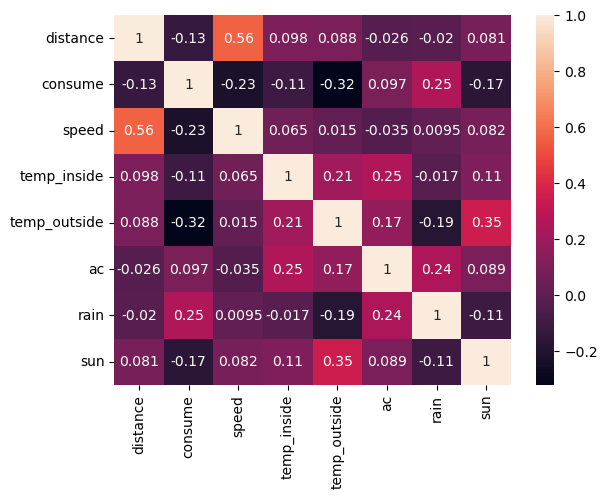

In [12]:
correlations_matrix = data.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

As expected the correlations are not high and the highest is speed and distance.

## Time to cluster some data in order to have clear plots

Clustering(creating bins) for distance

In [13]:
bin_distance=[1.3,50.0,100.0,150.0,216.1]
bin_labels=['<50', '50-100', '100-150', '150-216.1']
data['distance_labels']=pd.cut(data['distance'], bins = bin_distance,
                                               labels = bin_labels)

Clustering(creating bins) for consume

In [14]:
bin_consume=[3.30,4.70,5.3,8.0,12.2]
bin_labels=['<4.7', '4.7-5,3', '5.3-8', '8-12.2']
data['consume_labels']=pd.cut(data['consume'], bins = bin_consume,
                                               labels = bin_labels)

## Doing plots related to the gas type to understand it better

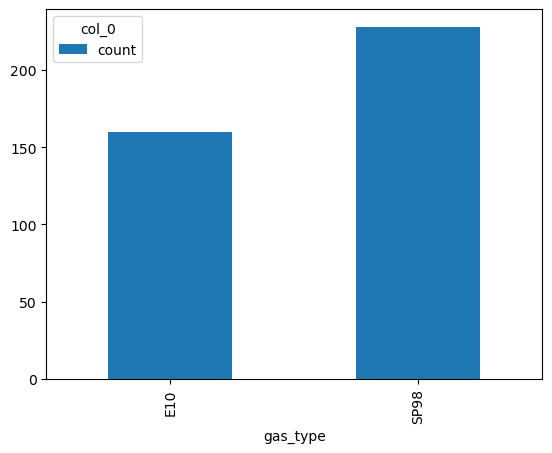

In [15]:
pd.crosstab(index=data['gas_type'], columns='count').plot(kind='bar')
plt.show()

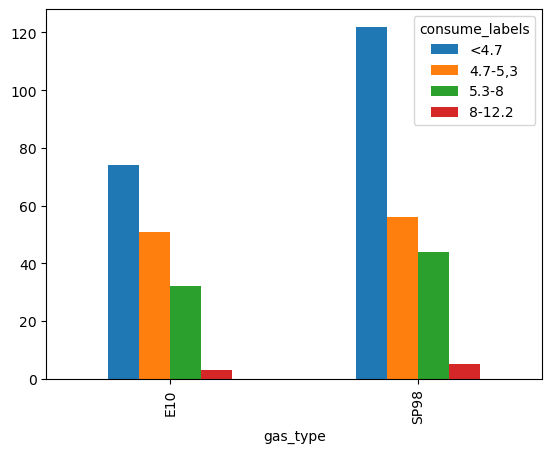

In [17]:
pd.crosstab(data.gas_type,data.consume_labels).plot(kind='bar')
plt.show()

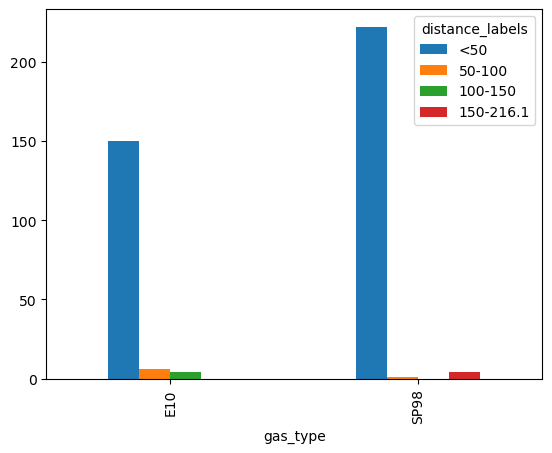

In [18]:
pd.crosstab(data.gas_type,data.distance_labels).plot(kind='bar')
plt.show()

As expected, tableau will be a better option to better understanding the data, therefore the plots done here will be revesisited there

In [19]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,distance_labels,consume_labels
0,28.0,5.0,26,21.934911,12,E10,0,0,0,<50,"4.7-5,3"
1,12.0,4.2,30,21.934911,13,E10,0,0,0,<50,<4.7
2,11.2,5.5,38,21.934911,15,E10,0,0,0,<50,5.3-8
3,12.9,3.9,36,21.934911,14,E10,0,0,0,<50,<4.7
4,18.5,4.5,46,21.934911,15,E10,0,0,0,<50,<4.7


In [21]:
data.to_csv('../data/data_for_tableau.csv', index=False)